# Classification of Mask and No Mask Images using CNN

<h3>Context :</h3>
Quarantine really made things hard for us. And with the increase in corona virus cases all over the world, masks have become necessary or rather compulsory. These images can help in various projects like mask detectors, classifier or real-time camera applications.

<h3>Content :</h3>
There are two folders in the maskdata folder. One folder contains a mixture of images for training and the other for testing.

In [1]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical # one hot encoding
from keras.models import load_model

import os 
import cv2 
import matplotlib.pyplot as plt

In [2]:
# Initiating variables with Paths and and Categories

path1 = r'D:\Datasets'
cate = ['Mask', 'No_Mask']

In [3]:
for i in cate:
    folders = os.path.join(path1, i) #' F:\data\with_mask'
    label   = cate.index(i)
    for image in os.listdir(folders):
        print(image)

115 - Copy (2).PNG
115 - Copy.PNG
115.PNG
maksssksksss0.png
maksssksksss1.png
maksssksksss10.png
maksssksksss100.png
maksssksksss101.png
maksssksksss102.png
maksssksksss103.png
maksssksksss104.png
maksssksksss105.png
maksssksksss106.png
maksssksksss107.png
maksssksksss108.png
maksssksksss109.png
maksssksksss11.png
maksssksksss110.png
maksssksksss111.png
maksssksksss112.png
maksssksksss113.png
maksssksksss114.png
maksssksksss115.png
maksssksksss116.png
maksssksksss117.png
maksssksksss118.png
maksssksksss119.png
maksssksksss12.png
maksssksksss120.png
maksssksksss121.png
maksssksksss122.png
maksssksksss123.png
maksssksksss124.png
maksssksksss125.png
maksssksksss126.png
maksssksksss127.png
maksssksksss129.png
maksssksksss13.png
maksssksksss130.png
maksssksksss131.png
maksssksksss132.png
maksssksksss133.png
maksssksksss134.png
maksssksksss135.png
maksssksksss136.png
maksssksksss137.png
maksssksksss138.png
maksssksksss139.png
maksssksksss14.png
maksssksksss140.png
maksssksksss141.png
maksssk

with_mask_3162.jpg
with_mask_3163.jpg
with_mask_3164.jpg
with_mask_3165.jpg
with_mask_3166.jpg
with_mask_3167.jpg
with_mask_3168.jpg
with_mask_3169.jpg
with_mask_317.jpg
with_mask_3170.jpg
with_mask_3171.jpg
with_mask_3172.jpg
with_mask_3173.jpg
with_mask_3174.jpg
with_mask_3175.jpg
with_mask_3176.jpg
with_mask_3177.jpg
with_mask_3178.jpg
with_mask_3179.jpg
with_mask_318.jpg
with_mask_3180.jpg
with_mask_3181.jpg
with_mask_3182.jpg
with_mask_3183.jpg
with_mask_3184.jpg
with_mask_3185.jpg
with_mask_3186.jpg
with_mask_3187.jpg
with_mask_3188.jpg
with_mask_3189.jpg
with_mask_319.jpg
with_mask_3190.jpg
with_mask_3191.jpg
with_mask_3192.jpg
with_mask_3193.jpg
with_mask_3194.jpg
with_mask_3195.jpg
with_mask_3196.jpg
with_mask_3197.jpg
with_mask_3198.jpg
with_mask_3199.jpg
with_mask_32.jpg
with_mask_320.jpg
with_mask_3200.jpg
with_mask_3201.jpg
with_mask_3202.jpg
with_mask_3203.jpg
with_mask_3204.jpg
with_mask_3205.jpg
with_mask_3206.jpg
with_mask_3207.jpg
with_mask_3208.jpg
with_mask_3209.jpg

without_mask_2312.jpg
without_mask_2313.jpg
without_mask_2314.jpg
without_mask_2315.jpg
without_mask_2316.jpg
without_mask_2317.jpg
without_mask_2318.jpg
without_mask_2319.jpg
without_mask_232.jpg
without_mask_2320.jpg
without_mask_2321.jpg
without_mask_2322.jpg
without_mask_2323.jpg
without_mask_2324.jpg
without_mask_2325.jpg
without_mask_2326.jpg
without_mask_2327.jpg
without_mask_2328.jpg
without_mask_2329.jpg
without_mask_233.jpg
without_mask_2330.jpg
without_mask_2331.jpg
without_mask_2332.jpg
without_mask_2333.jpg
without_mask_2334.jpg
without_mask_2335.jpg
without_mask_2336.jpg
without_mask_2337.jpg
without_mask_2338.jpg
without_mask_2339.jpg
without_mask_234.jpg
without_mask_2340.jpg
without_mask_2341.jpg
without_mask_2342.jpg
without_mask_2343.jpg
without_mask_2344.jpg
without_mask_2345.jpg
without_mask_2346.jpg
without_mask_2347.jpg
without_mask_2348.jpg
without_mask_2349.jpg
without_mask_235.jpg
without_mask_2350.jpg
without_mask_2351.jpg
without_mask_2352.jpg
without_mask_2

In [4]:
# Add every image to 'image_file' and convert it to an array 'image_array', later resize it to 100*100 image

input_image = []
image_size = 100

for i in cate:
    folders = os.path.join(path1, i)
    label   = cate.index(i)
    for image in os.listdir(folders):
        image_file = os.path.join(folders, image) #'F:\data\with_mask\with_mask_1.jpg'
        image_array = cv2.imread(image_file)
        image_array =cv2.resize(image_array , (image_size  , image_size) )
        input_image.append([image_array , label])
#       plt.imshow(image_array)

In [5]:
print(input_image[0:1])
print(len(input_image))

[[array([[[244, 251, 250],
        [244, 251, 250],
        [244, 251, 250],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [254, 255, 253]],

       [[244, 250, 249],
        [244, 250, 249],
        [244, 250, 249],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [254, 255, 253]],

       [[243, 249, 248],
        [243, 249, 248],
        [243, 249, 248],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [254, 255, 253]],

       ...,

       [[ 49,  27,  28],
        [ 49,  28,  29],
        [ 48,  29,  30],
        ...,
        [ 89,  56,  41],
        [ 86,  54,  40],
        [ 93,  61,  48]],

       [[ 50,  30,  29],
        [ 49,  29,  28],
        [ 48,  28,  28],
        ...,
        [ 92,  57,  47],
        [ 90,  56,  49],
        [ 90,  57,  50]],

       [[ 51,  32,  31],
        [ 50,  30,  30],
        [ 50,  30,  29],
        ...,
        [ 93,  59,  49],
        [ 89,  55,  48],
        [ 91,  57,  50

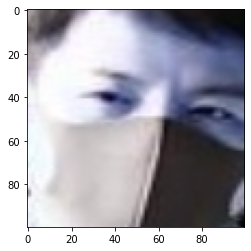

In [6]:
import numpy as np

np.random.shuffle(input_image)

X = []
Y = []

for x_val, labels in input_image[0:2000]:
    X.append(x_val)
    Y.append(labels)
    
X = np.array(X)
Y = np.array(Y)

X = X/255

plt.imshow(X[0])

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

In [8]:
print(X_train.shape)
print(Y_train.shape)

(1600, 100, 100, 3)
(1600,)


In [9]:
model = tf.keras.models.Sequential()  # model is initialized
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 1st hidden layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 2nd hidden layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 3rd hidden layer
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) # 10 is not hyper parameter
                                                                 # number of levels in target variable

In [10]:
model = Sequential() # modelis initialized
model.add(Conv2D(filters = 30, kernel_size = (5, 5), activation= 'relu',)) # Input/convolution layer Info, filters(sliders/kernels)
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Flatten())

model.add(Dense(128, activation= 'relu', input_shape = X_train.shape[1:])) # Hidden Layer
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

# adam = tf.keras.optimizers.Adam(lr = 0.01) # its not mandatory default is 0.001

model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])
 # 10 is not a hyper parameter
# number of layers in target variable

In [11]:
model.fit(X_train, Y_train, batch_size= 64, epochs=5, validation_split=.2)

Epoch 1/5
20/20 [==============================] - 9s 409ms/step - loss: 1.9818 - accuracy: 0.5742 - val_loss: 0.6520 - val_accuracy: 0.6781
Epoch 2/5
20/20 [==============================] - 7s 363ms/step - loss: 0.5995 - accuracy: 0.6891 - val_loss: 0.5654 - val_accuracy: 0.7437
Epoch 3/5
20/20 [==============================] - 7s 361ms/step - loss: 0.3701 - accuracy: 0.8570 - val_loss: 0.3433 - val_accuracy: 0.8594
Epoch 4/5
20/20 [==============================] - 8s 380ms/step - loss: 0.2116 - accuracy: 0.9234 - val_loss: 0.3116 - val_accuracy: 0.8594
Epoch 5/5
20/20 [==============================] - 7s 365ms/step - loss: 0.1268 - accuracy: 0.9570 - val_loss: 0.3818 - val_accuracy: 0.8594


In [12]:
pred = model.predict(X_test)

pred = np.argmax(pred, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

tab = confusion_matrix(Y_test, pred)
print('Confusion Matrix : \n Actual Values -> Predicted Values\n \n',tab)
print('\n',classification_report(Y_test, pred))

Confusion Matrix : 
 Actual Values -> Predicted Values
 
 [[173  48]
 [ 17 162]]

               precision    recall  f1-score   support

           0       0.91      0.78      0.84       221
           1       0.77      0.91      0.83       179

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



In [13]:
# Saving the Model to .h5 file to reuse it OpenCV Assignment

model.save("Mask_NoMask.h5")
loaded_model = load_model("Mask_NoMask.h5")
loss, accuracy = loaded_model.evaluate(X_test, Y_test)
print('Loss : \t \t',(loss*100))
print("Accuracy : \t", (accuracy*100))

13/13 [==============================] - 1s 72ms/step - loss: 0.4275 - accuracy: 0.8375
Loss : 	 	 42.746880650520325
Accuracy : 	 83.74999761581421


<h3>Conclusion : </h3>We have manager to achieve a <b>Precision : 92% and Accuracy : 92%</b>